#IBM Hackthon - Logistic Regression


Importing required lib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Read the data set
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
# discriptive static
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [ ]:
# finding shape
df.shape

(400, 5)

In [ ]:
df.isnull().sum()  # finding null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# droping unwanted column
df.drop(columns=['User ID'],inplace=True)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
# feature Mapping
df['Gender'].replace({'Male':1,'Female':0},inplace=True) # or  df=df['Gender'].replace({'Male':1,'Female':0})

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
# splitting data
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [ ]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

In [ ]:
# initialising logistic regression
log_reg=LogisticRegression()

In [ ]:
# Train Model
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Test Model
pred=log_reg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,pred)

array([[73,  0],
       [47,  0]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        73
           1       0.00      0.00      0.00        47

    accuracy                           0.61       120
   macro avg       0.30      0.50      0.38       120
weighted avg       0.37      0.61      0.46       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K - MEANS

In [ ]:
# reading the data set
data=pd.read_csv('/content/segmentation data.csv')

In [ ]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
data.describe() # statistics

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
data.info() # knowing data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
data.shape # finding no of col and row

(2000, 8)

In [ ]:
# finding null values
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
cor=data.corr()
cor

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [ ]:
import seaborn as sns

In [ ]:
# droping unwanted columns
data.drop(columns=['ID'],inplace=True)

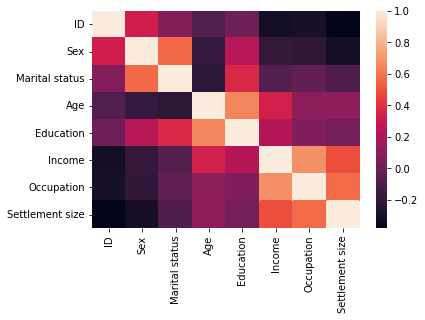

In [ ]:
sns.heatmap(cor)

In [ ]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
nm=MinMaxScaler()

In [ ]:
data_new=nm.fit_transform(data)

In [ ]:
data_new=pd.DataFrame(data_new)

In [ ]:
data_new.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [ ]:
from sklearn.cluster import  KMeans

In [ ]:
wcss=[]
for i in range(1,21):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(data_new)
  wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib as plt

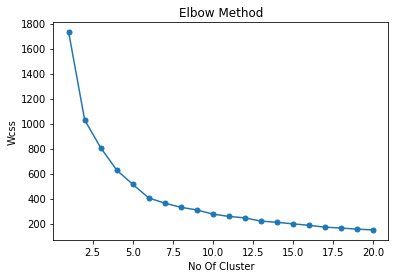

In [ ]:
plt.pyplot.plot(range(1,21),wcss,marker="o",markersize=5) # ,marker='0',markersize=5)
plt.pyplot.title("Elbow Method")
plt.pyplot.xlabel("No Of Cluster")
plt.pyplot.ylabel("Wcss")
plt.pyplot.show()

In [ ]:
km=KMeans(n_clusters=6,random_state=0)

In [ ]:
ypred=km.fit_predict(data_new)

In [ ]:
ypred

array([2, 4, 5, ..., 5, 1, 5], dtype=int32)

In [ ]:
data_new.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [ ]:
data_new['clus']=ypred

In [ ]:
data_new.head()

,0,1,2,3,4,5,6,clus
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,2
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,4
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,5
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,2
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,2
